In [ ]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [ ]:
# Load the uploaded CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure charts look nice
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Read the CSV
import io
df_car = pd.read_csv(io.BytesIO(uploaded['Car Sale.csv']))

# Preview the dataset
print("🔹 Dataset shape:", df_car.shape)
df_car.head()

🔹 Dataset shape: (23906, 16)


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
# Optional: Remove leading/trailing whitespaces in column names
df_car.columns = df_car.columns.str.strip()

# Check column names
print(df_car.columns.tolist())

['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region']


🔸 Average Selling Price by Dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.

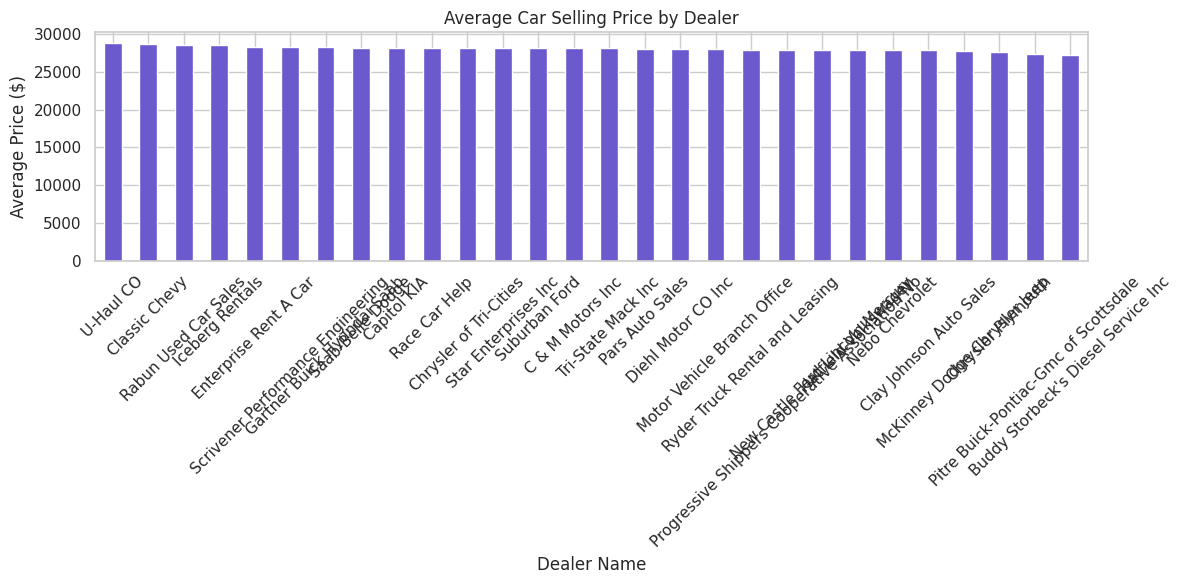

In [15]:
# Q1: Average selling price of cars for each dealer
dealer_avg_price = df_car.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

print("🔸 Average Selling Price by Dealer:")
print(dealer_avg_price)

# Bar chart to compare
plt.figure(figsize=(12,6))
dealer_avg_price.plot(kind='bar', color='slateblue')
plt.title('Average Car Selling Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🔸 Price Variation (Standard Deviation) by Brand:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


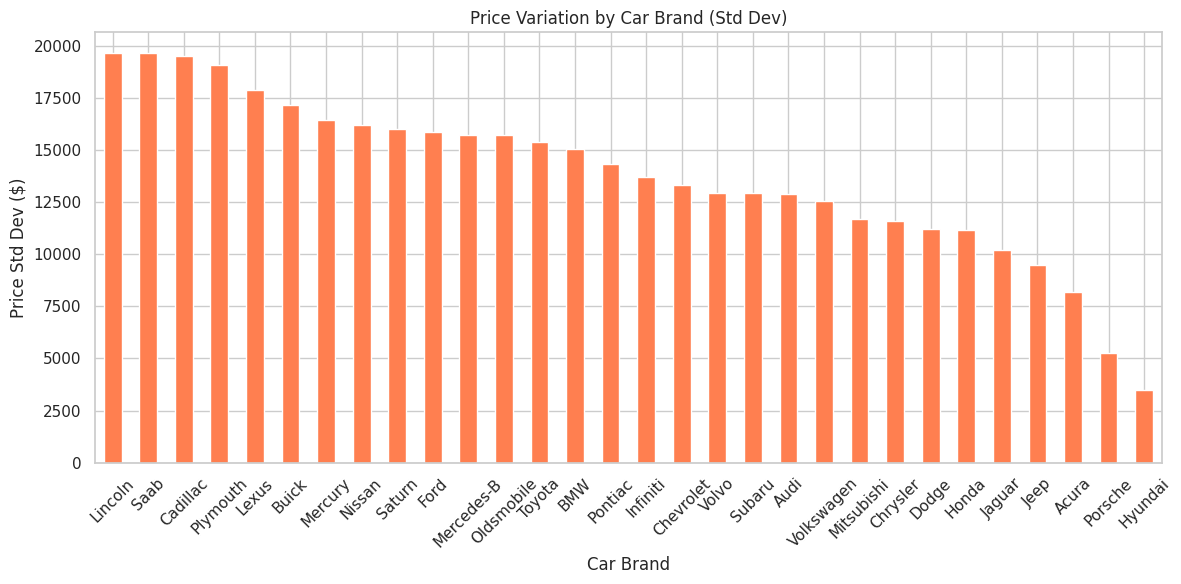

In [16]:
# Q2: Price variation by car brand
brand_price_std = df_car.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

print("🔸 Price Variation (Standard Deviation) by Brand:")
print(brand_price_std)

# Plot
plt.figure(figsize=(12,6))
brand_price_std.plot(kind='bar', color='coral')
plt.title('Price Variation by Car Brand (Std Dev)')
plt.xlabel('Car Brand')
plt.ylabel('Price Std Dev ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-17-15ccac74628b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Price ($)', data=df_car, palette='Set2')


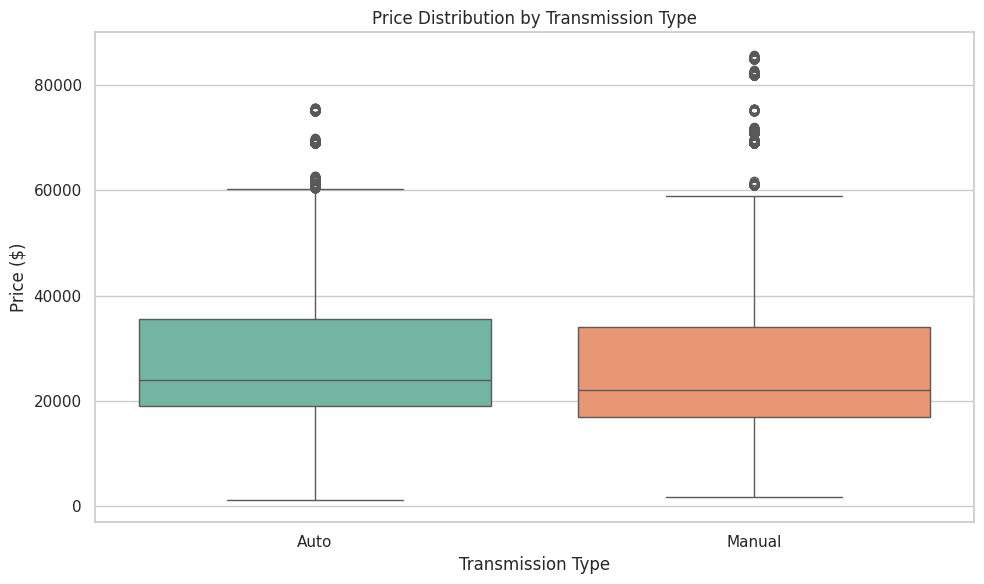

In [17]:
# Q3: Distribution of car prices by transmission type
plt.figure(figsize=(10,6))
sns.boxplot(x='Transmission', y='Price ($)', data=df_car, palette='Set2')
plt.title('Price Distribution by Transmission Type')
plt.ylabel('Price ($)')
plt.xlabel('Transmission Type')
plt.tight_layout()
plt.show()

<ipython-input-20-db9f7bf2199c>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


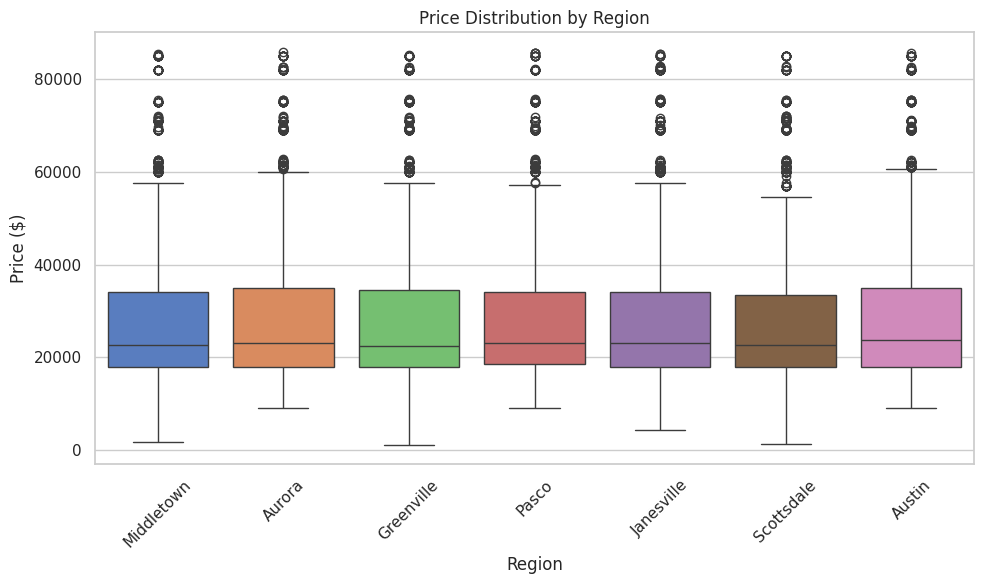

In [20]:
# Q4: Distribution of car prices by region
plt.figure(figsize=(10,6))
sns.boxplot(data=df_car, x='Dealer_Region', y='Price ($)', hue='Dealer_Region', palette='muted', dodge=False)
plt.title('Price Distribution by Region')
plt.ylabel('Price ($)')
plt.xlabel('Region')
plt.legend().remove()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🔸 Number of Cars by Body Style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


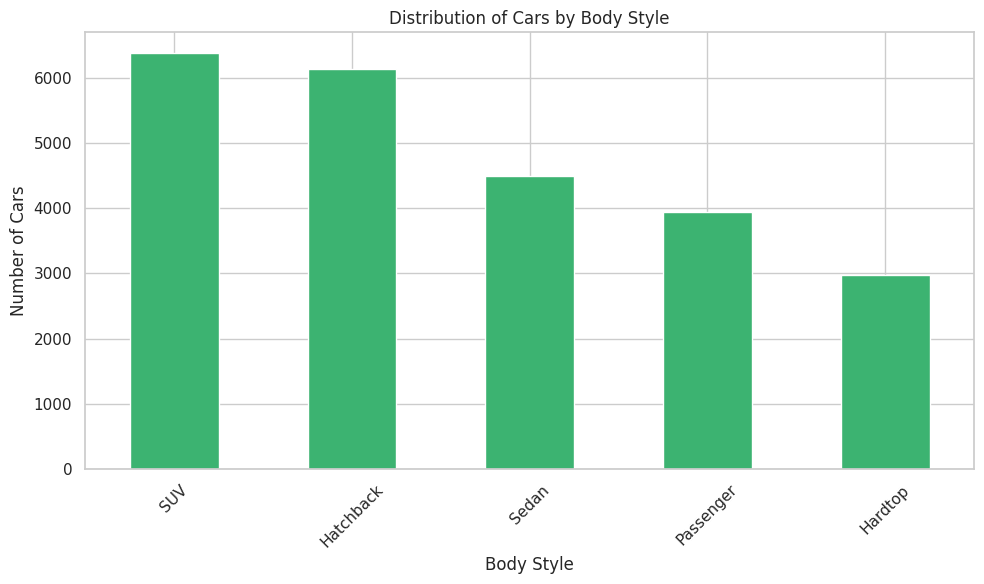

In [21]:
# Q5: Count of cars by body style
body_style_counts = df_car['Body Style'].value_counts()

print("🔸 Number of Cars by Body Style:")
print(body_style_counts)

# Plot
plt.figure(figsize=(10,6))
body_style_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-22-1e130ae429d4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_gender_income = df_car.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack()


🔸 Average Selling Price by Gender and Income Bracket:
Income_Bracket          <30k  30k-60k  60k-100k     100k-150k         150k+
Gender                                                                     
Female          28132.038732      NaN       NaN  33000.500000  28316.441814
Male            27816.302247      NaN   43000.0  16666.666667  28103.754282


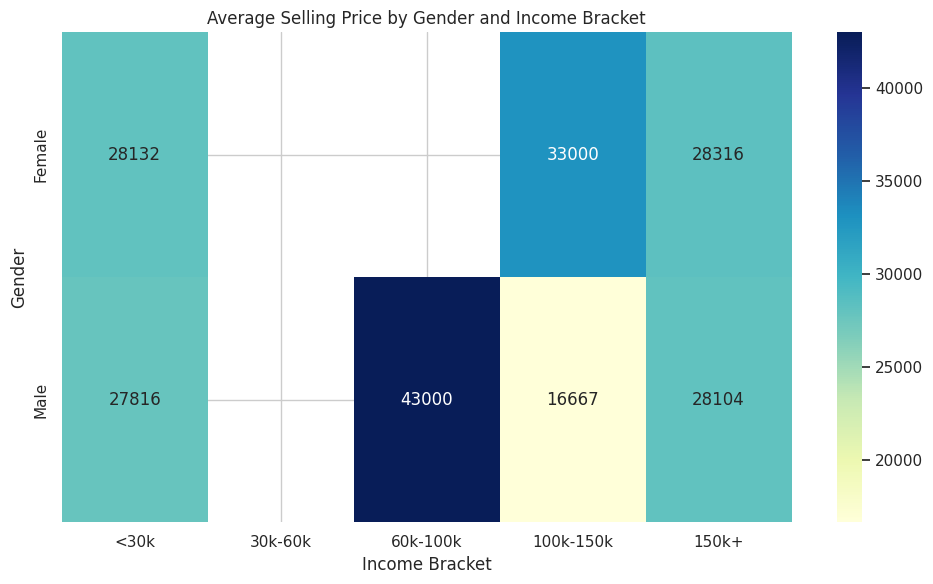

In [22]:
# Q6: Average selling price by Gender and Annual Income Bracket
df_car['Income_Bracket'] = pd.cut(df_car['Annual Income'], bins=[0, 30000, 60000, 100000, 150000, np.inf],
                                   labels=['<30k', '30k-60k', '60k-100k', '100k-150k', '150k+'])

avg_price_gender_income = df_car.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack()

print("🔸 Average Selling Price by Gender and Income Bracket:")
print(avg_price_gender_income)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(avg_price_gender_income, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Selling Price by Gender and Income Bracket")
plt.ylabel("Gender")
plt.xlabel("Income Bracket")
plt.tight_layout()
plt.show()

<ipython-input-10-d5d849e2f00f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dealer_Region', y='Price ($)', data=df_car, palette='Set3')


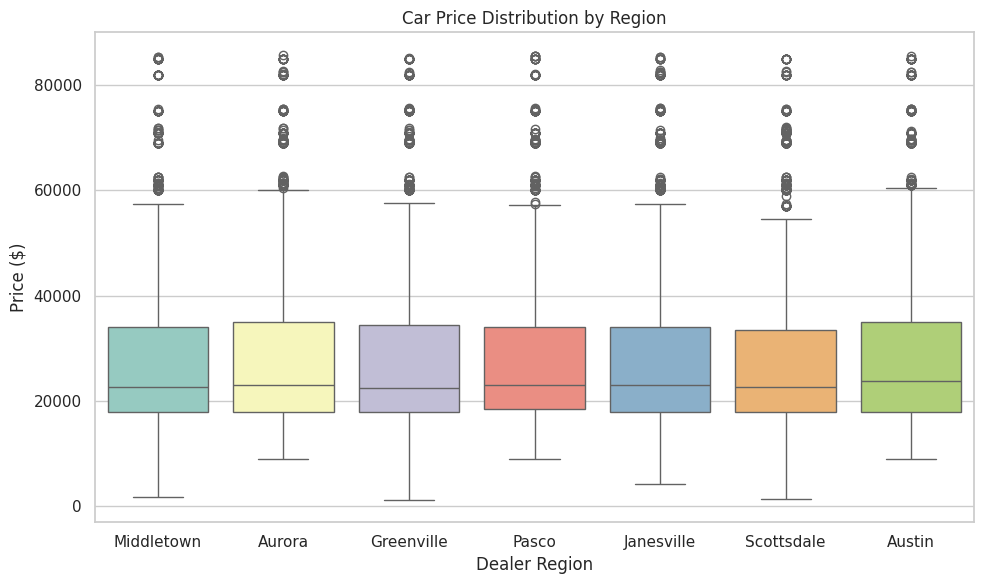

🔸 Number of Cars Sold by Region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


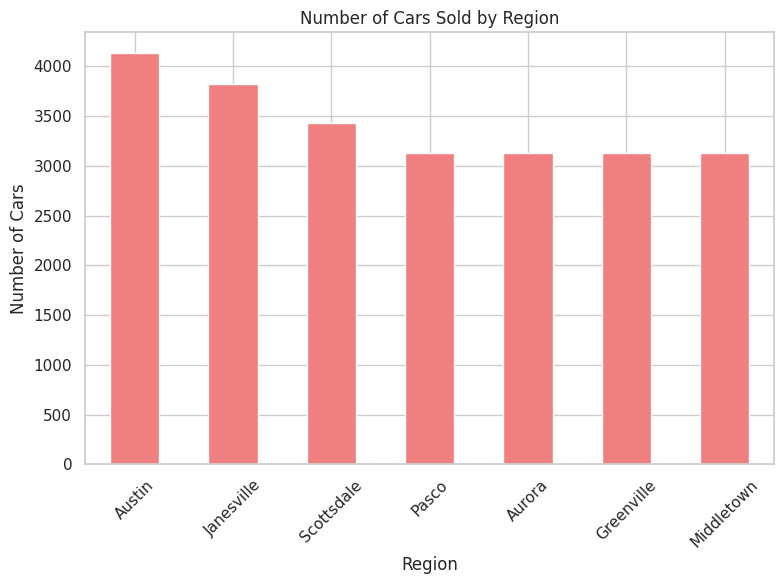

In [ ]:
# Q7: Car price distribution and count by region

# Distribution of prices using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df_car, palette='Set3')
plt.title('Car Price Distribution by Region')
plt.ylabel('Price ($)')
plt.xlabel('Dealer Region')
plt.tight_layout()
plt.show()

# Number of cars sold by region
region_counts = df_car['Dealer_Region'].value_counts()

print("🔸 Number of Cars Sold by Region:")
print(region_counts)

# Bar plot of number of cars sold
plt.figure(figsize=(8,6))
region_counts.plot(kind='bar', color='lightcoral')
plt.title('Number of Cars Sold by Region')
plt.ylabel('Number of Cars')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

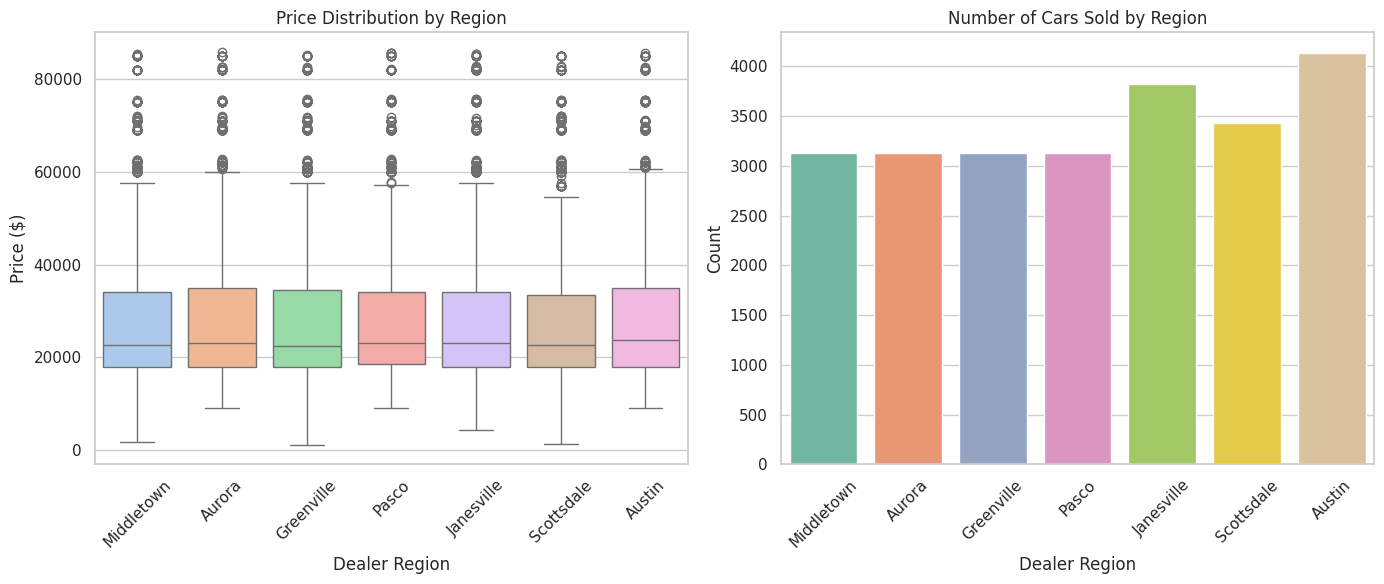

In [27]:
# Q7: Price distribution & count of cars sold by region (fixed for seaborn warning)
plt.figure(figsize=(14,6))

# Distribution plot
plt.subplot(1,2,1)
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df_car, hue='Dealer_Region', palette='pastel', legend=False)
plt.title('Price Distribution by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)

# Count plot
plt.subplot(1,2,2)
sns.countplot(x='Dealer_Region', data=df_car, hue='Dealer_Region', palette='Set2', legend=False)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

🔸 Average Price by Engine Type:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


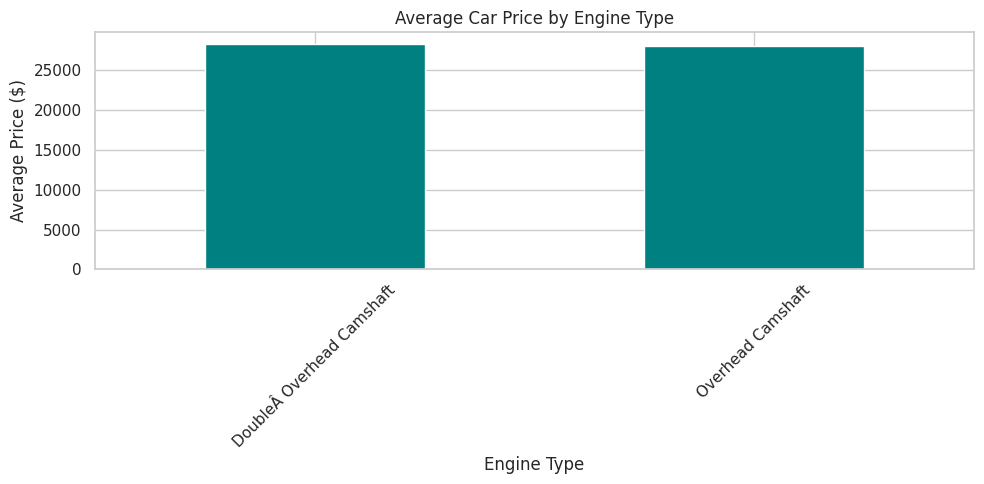

In [24]:
# Q8: Average price by Engine type
avg_price_engine = df_car.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

print("🔸 Average Price by Engine Type:")
print(avg_price_engine)

# Bar chart
plt.figure(figsize=(10,5))
avg_price_engine.plot(kind='bar', color='teal')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

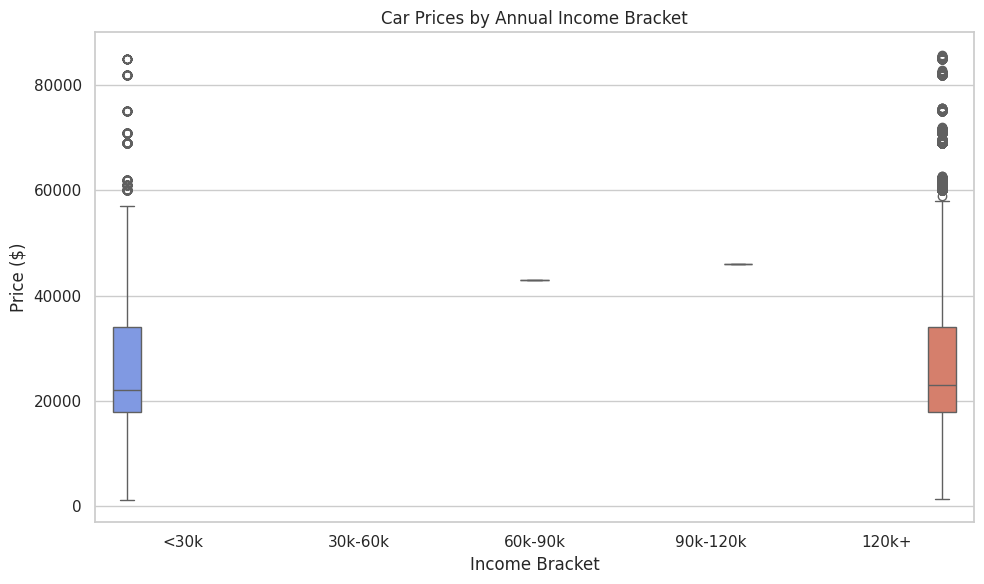

In [28]:
# Q9: Car prices vs. customer income bracket (fixed for seaborn warning)

# Create income brackets
bins = [0, 30000, 60000, 90000, 120000, np.inf]
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+']
df_car['Income_Bracket'] = pd.cut(df_car['Annual Income'], bins=bins, labels=labels)

# Boxplot to compare prices across income brackets
plt.figure(figsize=(10,6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df_car, hue='Income_Bracket', palette='coolwarm', legend=False)
plt.title('Car Prices by Annual Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

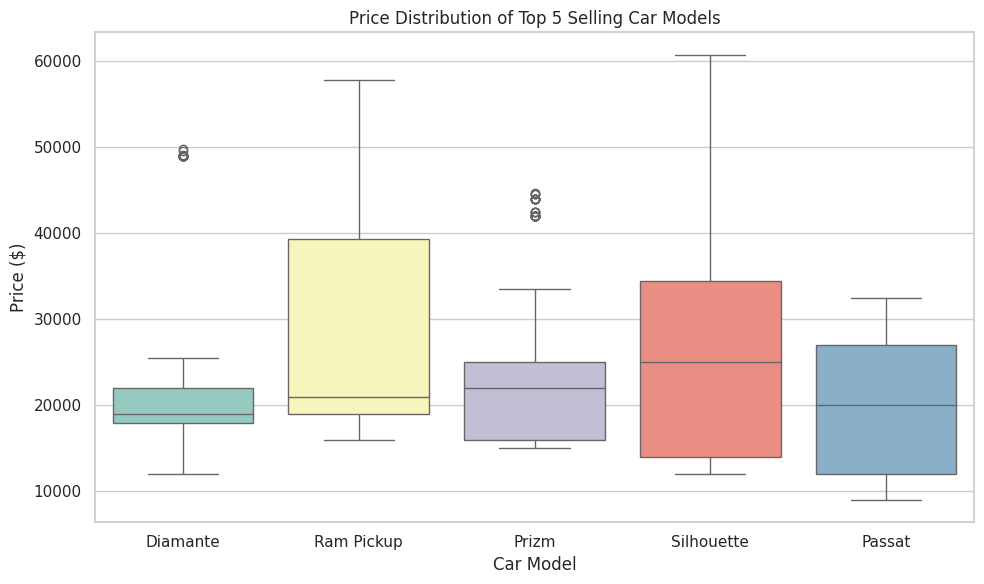

In [29]:
# Q10: Top 5 car models by sales and their price distribution (fixed seaborn warning)

# Find top 5 models by count
top_models = df_car['Model'].value_counts().nlargest(5).index
top_models_df = df_car[df_car['Model'].isin(top_models)]

# Boxplot for price distribution of top 5 models
plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Price ($)', data=top_models_df, hue='Model', palette='Set3', legend=False)
plt.title('Price Distribution of Top 5 Selling Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

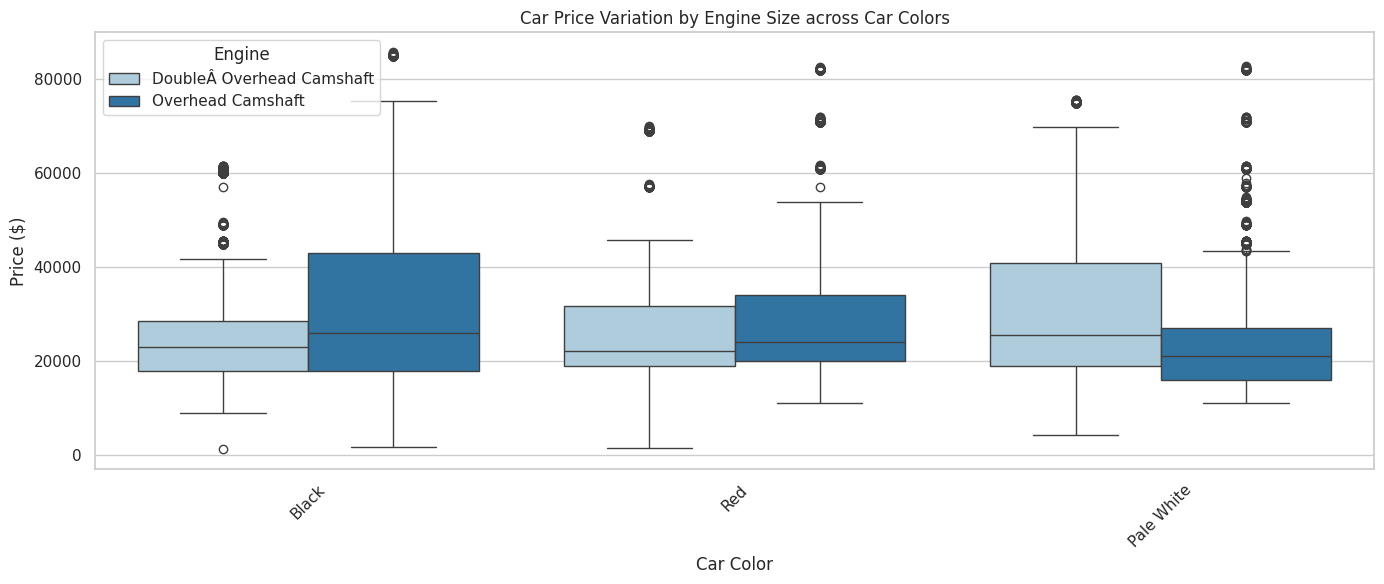

🔹 Price Variation (Standard Deviation) by Car Color:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [30]:
# Q11: Car price vs engine size across car colors + highest price variation by color

# Boxplot: Price by Color and Engine
plt.figure(figsize=(14,6))
sns.boxplot(x='Color', y='Price ($)', hue='Engine', data=df_car, palette='Paired')
plt.title('Car Price Variation by Engine Size across Car Colors')
plt.xlabel('Car Color')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Standard deviation of price by color to find highest variation
price_variation_by_color = df_car.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("🔹 Price Variation (Standard Deviation) by Car Color:")
print(price_variation_by_color)

<ipython-input-36-cdc0c3c0bdbb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df_car, palette='summer')


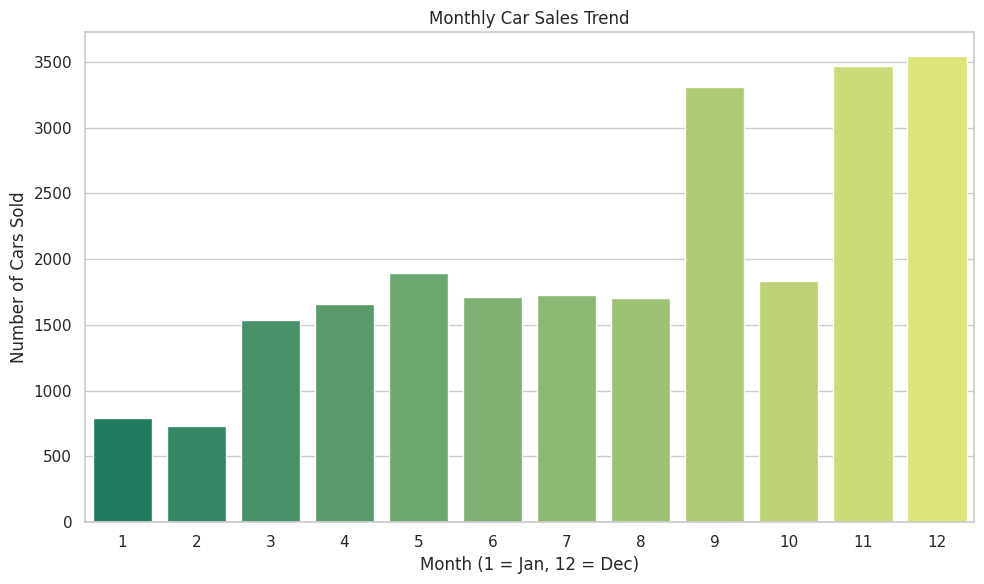

In [36]:
# Q12: Seasonal trend in car sales based on date

# Convert 'Date' to datetime format
df_car['Date'] = pd.to_datetime(df_car['Date'])

# Extract Month for seasonal analysis
df_car['Month'] = df_car['Date'].dt.month

# Countplot of sales per month
plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=df_car, palette='summer')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month (1 = Jan, 12 = Dec)')
plt.ylabel('Number of Cars Sold')
plt.tight_layout()
plt.show()

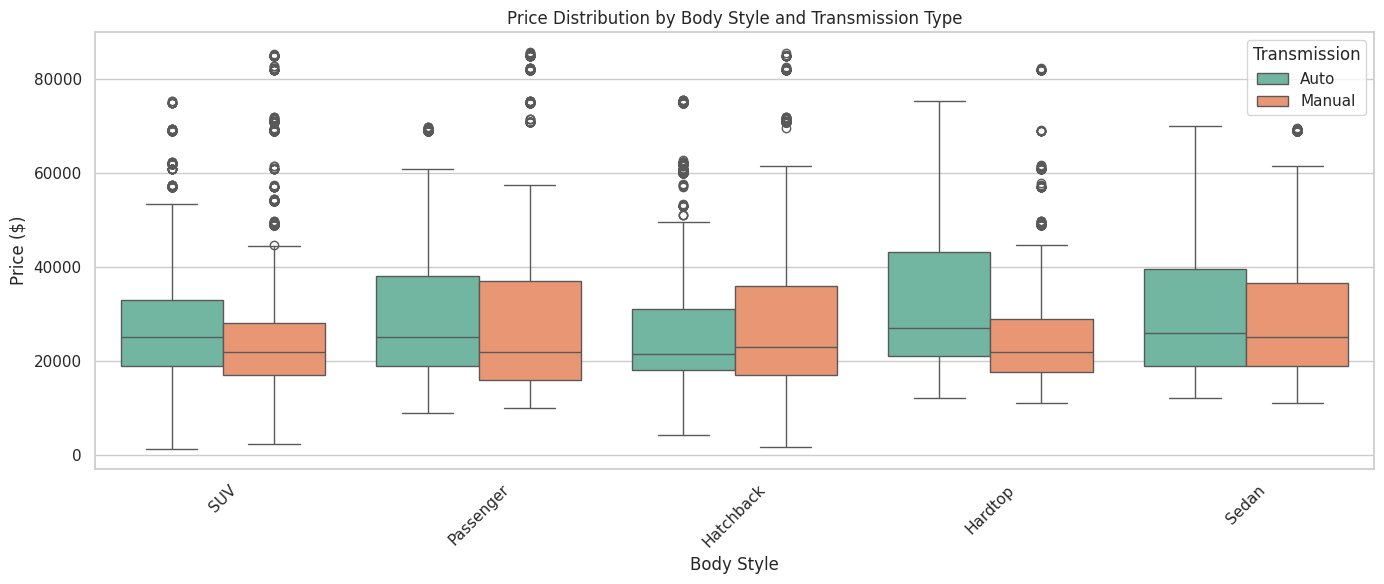

In [32]:
# Q13: Price distribution by body style & transmission type

# Boxplot for price distribution by body style and transmission
plt.figure(figsize=(14,6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df_car, palette='Set2')
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

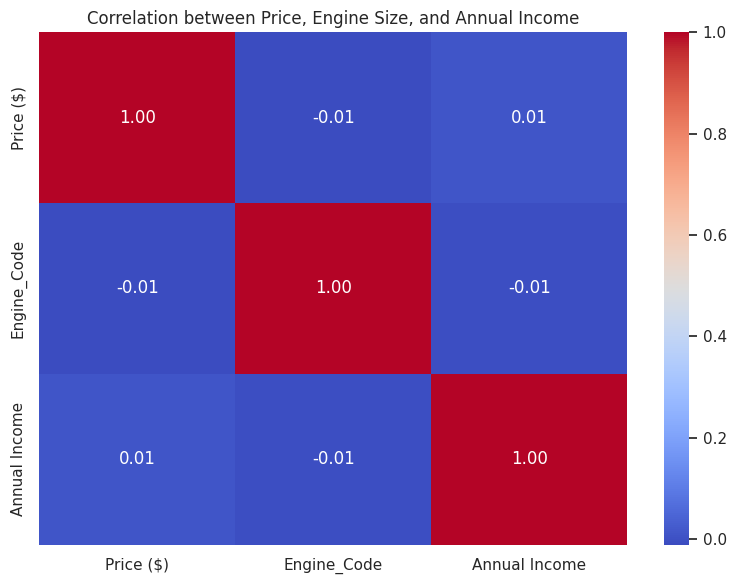

In [33]:
# Q14: Correlation between car price, engine size, and annual income

# Encode engine types to numeric for correlation
df_car['Engine_Code'] = df_car['Engine'].astype('category').cat.codes

# Select numeric columns for correlation
corr_df = df_car[['Price ($)', 'Engine_Code', 'Annual Income']]

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Price, Engine Size, and Annual Income')
plt.tight_layout()
plt.show()

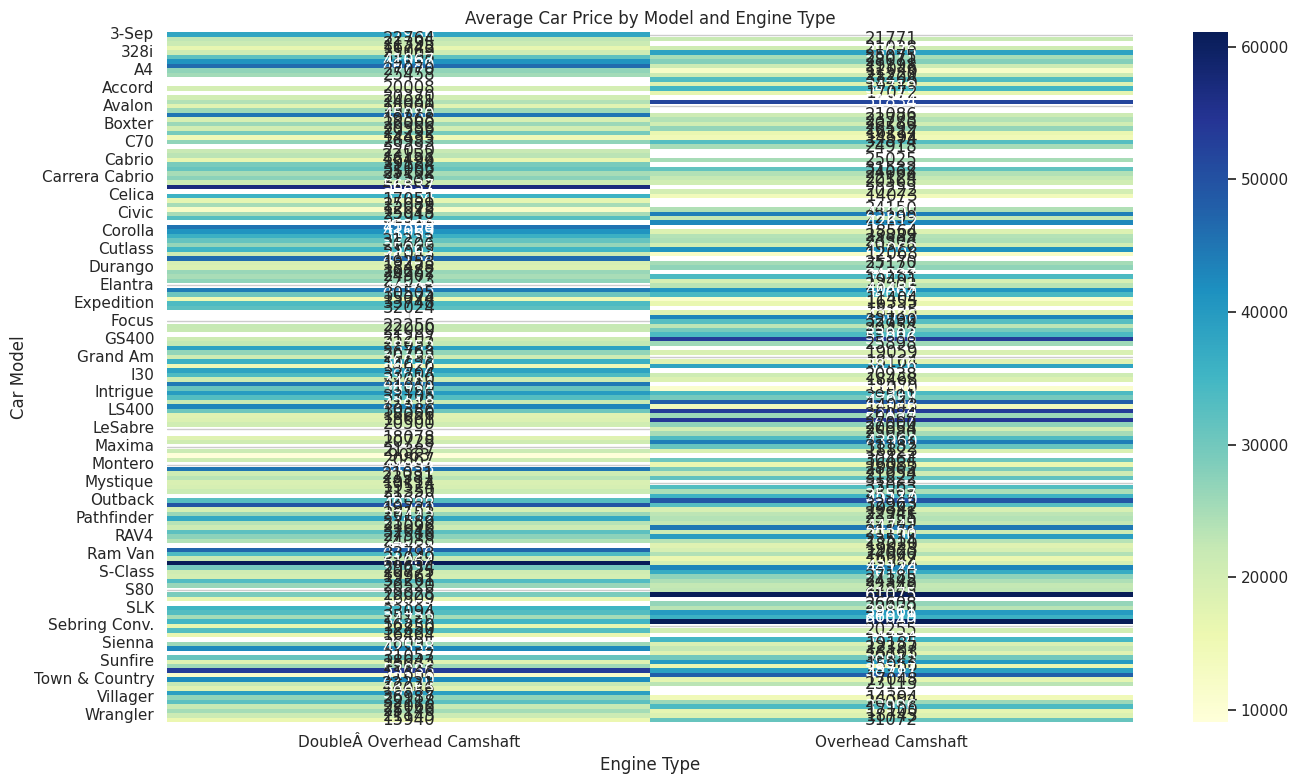

In [34]:
# Q15: Average car price across models and engine types

# Group by Model and Engine, compute average price
avg_price_model_engine = df_car.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Pivot for heatmap
pivot = avg_price_model_engine.pivot(index='Model', columns='Engine', values='Price ($)')

# Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()